In [36]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
!pwd

/Users/slava/temp


In [9]:
!ls cats_and_dogs_filtered/

train        validation   vectorize.py


In [10]:
train_dir = "/Users/slava/temp/cats_and_dogs_filtered/train/"
valid_dir = "/Users/slava/temp/cats_and_dogs_filtered/validation/"

In [11]:
BATCH_SIZE = 50
IMG_SHAPE  = 150

In [22]:
train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [28]:
train_data_gen = train_image_generator.flow_from_directory(train_dir, 
                                          target_size=(IMG_SHAPE, IMG_SHAPE), 
                                          class_mode="binary",
                                          batch_size=BATCH_SIZE
                                         )

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [29]:
sample_train_data_gen, sample_labels = next(train_data_gen)

In [50]:
sample_train_data_gen[0]

array([[[0.90196085, 0.8078432 , 0.8000001 ],
        [0.8980393 , 0.78823537, 0.7843138 ],
        [0.909804  , 0.7568628 , 0.7686275 ],
        ...,
        [0.94117653, 0.6745098 , 0.6784314 ],
        [0.9607844 , 0.68235296, 0.69803923],
        [0.92549026, 0.6745098 , 0.6666667 ]],

       [[0.85098046, 0.7411765 , 0.7372549 ],
        [0.8862746 , 0.7607844 , 0.76470596],
        [0.9450981 , 0.7803922 , 0.7960785 ],
        ...,
        [0.9215687 , 0.68235296, 0.6784314 ],
        [0.909804  , 0.6666667 , 0.67058825],
        [0.9215687 , 0.67058825, 0.67058825]],

       [[0.882353  , 0.7294118 , 0.7411765 ],
        [0.93725497, 0.7725491 , 0.78823537],
        [0.97647065, 0.7843138 , 0.8078432 ],
        ...,
        [0.9333334 , 0.72156864, 0.7137255 ],
        [0.909804  , 0.72156864, 0.7137255 ],
        [0.94117653, 0.7019608 , 0.69803923]],

       ...,

       [[0.21568629, 0.03921569, 0.01960784],
        [0.20000002, 0.04705883, 0.01960784],
        [0.18431373, 0

Text(0.5, 1.0, 'Dog')

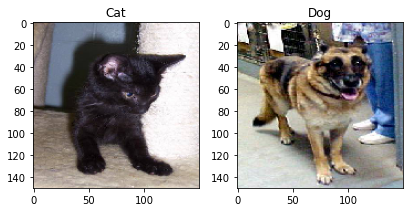

In [73]:
plt.figure(figsize=(14,14))
plt.subplot(4,4, 1)
plt.imshow(sample_train_data_gen[11])
plt.title('Cat')
plt.subplot(4,4, 2)
plt.imshow(sample_train_data_gen[10])
plt.title('Dog')

In [75]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [77]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 128)       204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)            

In [81]:
EPOCHS = 20
history = model.fit(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=valid_data_gen)

Epoch 1/20
40/40 [==============================] - 77s 2s/step - loss: 0.6918 - accuracy: 0.5275 - val_loss: 0.6907 - val_accuracy: 0.5015
Epoch 2/20
40/40 [==============================] - 87s 2s/step - loss: 0.6896 - accuracy: 0.5240 - val_loss: 0.6819 - val_accuracy: 0.5780
Epoch 3/20
40/40 [==============================] - 80s 2s/step - loss: 0.6703 - accuracy: 0.5835 - val_loss: 0.6436 - val_accuracy: 0.6265
Epoch 4/20
40/40 [==============================] - 75s 2s/step - loss: 0.6459 - accuracy: 0.6120 - val_loss: 0.6092 - val_accuracy: 0.6565
Epoch 5/20
40/40 [==============================] - 74s 2s/step - loss: 0.6446 - accuracy: 0.6390 - val_loss: 0.6084 - val_accuracy: 0.6560
Epoch 6/20
40/40 [==============================] - 74s 2s/step - loss: 0.5859 - accuracy: 0.6870 - val_loss: 0.5820 - val_accuracy: 0.6855
Epoch 7/20
40/40 [==============================] - 74s 2s/step - loss: 0.5773 - accuracy: 0.7040 - val_loss: 0.5464 - val_accuracy: 0.7160
Epoch 8/20
40/40 [==

In [82]:
valid_data_gen = validation_image_generator.flow_from_directory(train_dir, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE), 
                                               class_mode="binary",
                                               batch_size=BATCH_SIZE
                                               )

Found 2000 images belonging to 2 classes.


In [119]:
sample_validation_images, sample_validation_labels = next(valid_data_gen)
predicted = model.predict(sample_validation_images).flatten()

In [120]:
sample_validation_images

array([[[[0.3921569 , 0.38823533, 0.36862746],
         [0.41960788, 0.4156863 , 0.39607847],
         [0.50980395, 0.49803925, 0.4784314 ],
         ...,
         [0.4784314 , 0.5411765 , 0.67058825],
         [0.5372549 , 0.59607846, 0.7176471 ],
         [0.49411768, 0.5647059 , 0.6509804 ]],

        [[0.427451  , 0.42352945, 0.4039216 ],
         [0.38823533, 0.38431376, 0.3647059 ],
         [0.44705886, 0.43529415, 0.4156863 ],
         ...,
         [0.52156866, 0.58431375, 0.7137255 ],
         [0.5019608 , 0.56078434, 0.68235296],
         [0.49803925, 0.56078434, 0.6509804 ]],

        [[0.39607847, 0.39607847, 0.3647059 ],
         [0.44705886, 0.44705886, 0.4156863 ],
         [0.41176474, 0.40000004, 0.37254903],
         ...,
         [0.5137255 , 0.5764706 , 0.7058824 ],
         [0.5137255 , 0.57254905, 0.69411767],
         [0.4666667 , 0.5294118 , 0.61960787]],

        ...,

        [[0.34117648, 0.3372549 , 0.32156864],
         [0.22352943, 0.21960786, 0.20392159]

In [116]:
sample_validation_labels = sample_validation_labels.astype("int32")
sample_validation_labels

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [121]:
predicted

array([8.3541262e-01, 9.8838699e-01, 9.9996412e-01, 9.7493923e-01,
       4.7028065e-04, 9.9495202e-01, 4.2847759e-01, 1.3371706e-03,
       9.9595225e-01, 1.6356456e-06, 1.8735528e-02, 9.8232406e-01,
       1.9980705e-01, 9.9999511e-01, 5.0610334e-02, 2.3028255e-03,
       9.9999237e-01, 9.9999976e-01, 9.9964952e-01, 5.8023930e-02,
       3.2357275e-03, 6.2550171e-05, 9.8543429e-01, 1.8334687e-03,
       9.3778968e-01, 9.9984908e-01, 2.0280808e-02, 8.3030091e-06,
       2.5724844e-07, 9.9271154e-01, 9.9307752e-01, 9.7921860e-01,
       7.9384971e-01, 9.9881816e-01, 9.9740797e-01, 8.3017993e-01,
       3.3944845e-04, 9.9997759e-01, 9.9997663e-01, 6.5993667e-03,
       3.4501511e-05, 1.0000000e+00, 9.9903196e-01, 1.3546323e-05,
       1.1858314e-02, 9.8093009e-01, 9.9992067e-01, 6.0062706e-03,
       9.9979532e-01, 9.6247649e-01], dtype=float32)

In [122]:
predicted = (predicted > 0.5).astype("int32")
predicted

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1], dtype=int32)

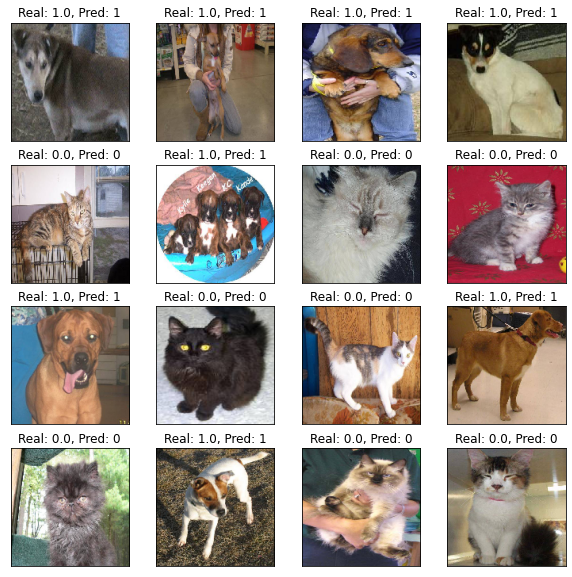

In [123]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.title(f"Real: {sample_validation_labels[i]}, Pred: {predicted[i]}")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample_validation_images[i])